In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib tk

In [2]:
import matplotlib.pyplot as plt
import os
import os.path
import numpy as np
import math
import Optimization_Convergence_Plotter
import Optimization_Shape_Plotter
import Optimization_Gradient_Plotter

## Setup

In [3]:
# Absolute path to the directory with all the optimization results
DPG_SOLVER_PATH="/home/vassili/Desktop/DPGSolver/DPGSolver/"

OPTIMIZATION_RESULTS_REL_PATH="Archived_Output/Vassili/"
#REPRODUCING MANMEET RESULTS
#OPTIMIZATION_RESULTS_REL_PATH="Archived_Output/Vassili/Manmeet/"
#MESH_FOLDER="ML2/"

#START WITH CIRCULAR SHAPE
#OPTIMIZATION_RESULTS_REL_PATH="Archived_Output/Vassili/Circular/"
#MESH_FOLDER=""

CONST_OPTIMIZATION_DIR_ABS_PATH = DPG_SOLVER_PATH+OPTIMIZATION_RESULTS_REL_PATH


In [4]:
# Absolute path to the directory to save the output files (plots)
CONST_figure_output_directory = DPG_SOLVER_PATH+"figs/"

def get_file_object(mesh_dims, p, nurbs_p, nctrl, colour):
    print(mesh_dims)
    folder="NCTRL%d/M%dx%d_P%d_NURBS_P%d/" % (nctrl,mesh_dims[0], mesh_dims[1], p, nurbs_p)
    
    return (folder+"ML1_P%d_Optimization_Convergence.txt" % p, 
         folder+"ML1_P%d_Optimized_NURBS_Patch.txt" % p,
         folder+"ML1_P%d_Objective_Gradient.txt" % p, 
         "N_CTRL=%d, P=%d, M=%dx%d" % (nctrl, p,mesh_dims[0], mesh_dims[1]), colour, "-", ".", True)

In [5]:
# The files to read. The first file holds the convergence data, the second holds the shape profile
# and the third holds the gradient.


#MESH_SET_ID="M21x17_MD"
DOF1000_MD=[[38,27], #1000 dof
            [19,14],
            [14,10],]

DOF2000_MD=[ [53,38],
           [28,19],
         [18,13]]

M53x38_MD=[[53,38],[53,38],[53,38]]
M28x19_MD=[[28,19],[28,19],[28,19]]
M21x17_MD=[[21,17], [21,17], [21,17]]

P1_ML_VARY=[ [38,27], #1,2,3k dof
                     [53,38],
                     [65,46]]
P2_ML_VARY=[ [19,14], #1,2,3k dof
                     [28,19],
                     [34,23]]

P3_ML_VARY=[ [14,10], #1,2,3k dof
                     [18,13],
                     [23,16]]
DOF2000_MD=[ [53,38],
           [28,19],
         [18,13]]


NCTRL=11
MESH_SET_ID="M21x17_MD"
MESH_DIMS=eval(MESH_SET_ID)
FIG_ID="NCTRL_"+str(NCTRL)+MESH_SET_ID
ML1=get_file_object(mesh_dims=MESH_DIMS[0], p=1, nurbs_p=3, nctrl=NCTRL, colour='r')
ML2=get_file_object(mesh_dims=MESH_DIMS[1], p=2, nurbs_p=3, nctrl=NCTRL, colour='g')
ML3=get_file_object(mesh_dims=MESH_DIMS[2], p=3, nurbs_p=3,nctrl=NCTRL, colour='b')
"""
#VARY ORDER P/ mesh size, keep constant # dof                  
NCTRL=11
MESH_SET_ID="DOF2000_MD"
MESH_DIMS=eval(MESH_SET_ID)
FIG_ID="NCTRL_"+str(NCTRL)+MESH_SET_ID
ML1=get_file_object(mesh_dims=MESH_DIMS[0], p=1, nurbs_p=3, nctrl=NCTRL, colour='r')
ML2=get_file_object(mesh_dims=MESH_DIMS[1], p=2, nurbs_p=3, nctrl=NCTRL, colour='g')
ML3=get_file_object(mesh_dims=MESH_DIMS[2], p=3, nurbs_p=3, nctrl=NCTRL, colour='b')
          
#VARY MESH SIZE               
NCTRL=15
P=2
MESH_SET_ID="P"+str(P)+"_ML_VARY"
MESH_DIMS=eval(MESH_SET_ID)
FIG_ID="NCTRL_"+str(NCTRL)+MESH_SET_ID
ML1=get_file_object(mesh_dims=MESH_DIMS[0], p=P, nurbs_p=3, nctrl=NCTRL, colour='r')
ML2=get_file_object(mesh_dims=MESH_DIMS[1], p=P, nurbs_p=3, nctrl=NCTRL, colour='g')
ML3=get_file_object(mesh_dims=MESH_DIMS[2], p=P, nurbs_p=3, nctrl=NCTRL, colour='b')

#SET NURBS ORDER P
NCTRL=11
NURBS_P=4
MESH_SET_ID="DOF1000_MD"
MESH_DIMS=eval(MESH_SET_ID)
FIG_ID="NURBS_P"+str(NURBS_P)+"_NCTRL_"+str(NCTRL)+MESH_SET_ID
ML1=get_file_object(mesh_dims=MESH_DIMS[0], p=1, nurbs_p=NURBS_P, nctrl=NCTRL, colour='r')
ML2=get_file_object(mesh_dims=MESH_DIMS[1], p=2, nurbs_p=NURBS_P, nctrl=NCTRL, colour='g')
ML3=get_file_object(mesh_dims=MESH_DIMS[2], p=3, nurbs_p=NURBS_P, nctrl=NCTRL, colour='b')

#VAR NUMBER CONTROL POINTS ORDER P
NURBS_P=3
MESH_SET_ID="M53x38_MD"
P=1
MESH_SET_ID="M28x19_MD"
P=2
MESH_DIMS=eval(MESH_SET_ID)
FIG_ID="NURBS_P"+str(NURBS_P)+"_NCTRL_"+"VARY_"+MESH_SET_ID
ML1=get_file_object(mesh_dims=MESH_DIMS[0], p=P, nurbs_p=NURBS_P, nctrl=11, colour='r')
ML2=get_file_object(mesh_dims=MESH_DIMS[1], p=P, nurbs_p=NURBS_P, nctrl=13, colour='g')
ML3=get_file_object(mesh_dims=MESH_DIMS[2], p=P, nurbs_p=NURBS_P, nctrl=15, colour='b')
"""
CONST_File_list = [
    ML1, 
    ML2, 
    #ML3
]


[21, 17]
[21, 17]
[21, 17]


## Convergence Plots
The following consists of plots of the convergence of the cost function and its gradient's L2 norm as 
a function of design iterations and CPU time. Additional plots that are optionally included are the 
convergence of the lift coefficient and pitching moment.

In [6]:
file_convergence_data = []

for data_tuple in CONST_File_list:
    convergence_file_abs_path = os.path.join(CONST_OPTIMIZATION_DIR_ABS_PATH, data_tuple[0])
    conv_data = Optimization_Convergence_Plotter.read_convergence_file(convergence_file_abs_path)

    file_convergence_data.append(conv_data)

### Cost Function vs. Design Iterations and CPU Time

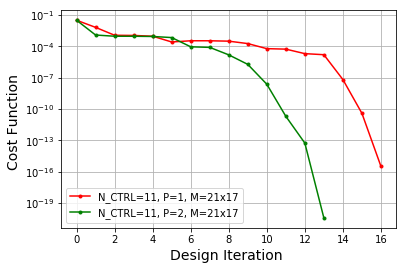

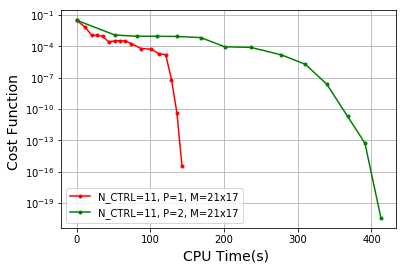

In [7]:

# log(Objective) Convergence vs. Iteration
plt.figure(1)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "Design_Iteration", 
                                                      "Cost_Function", True)
#plt.savefig(os.path.join(CONST_figure_output_directory, "cost_vs_iteration_Pall.pdf"))

# log(Objective) Convergence vs. CPU time
plt.figure(2)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "CPU_Time(s)", 
                                                      "Cost_Function", True)


### Gradient of Cost Function L2 Norm vs Design Iterations and CPU Time

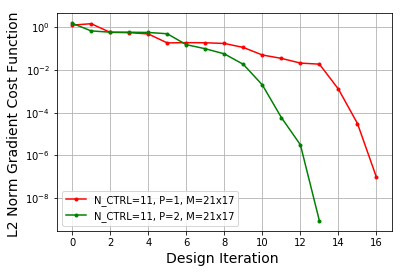

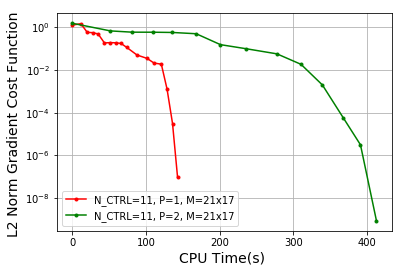

In [8]:
# log(Gradient) Convergence vs. Iteration
plt.figure(1)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "Design_Iteration", 
                                                      "L2_Norm_Gradient_Cost_Function", True)
#plt.savefig(os.path.join(CONST_figure_output_directory, "grad_vs_iteration_Pall.pdf"))

# log(Gradient) Convergence vs. CPU time
plt.figure(2)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "CPU_Time(s)", 
                                                      "L2_Norm_Gradient_Cost_Function", True)



### Lift Coefficient vs Design Iterations and CPU Time

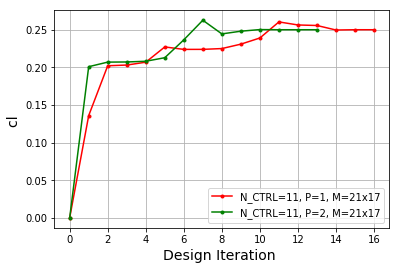

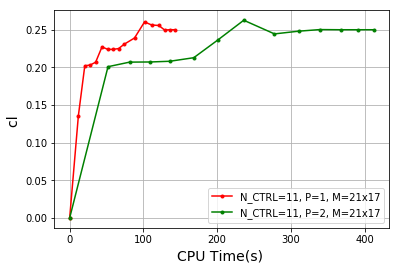

In [9]:
# CL Convergence vs. Iteration
plt.figure(1)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "Design_Iteration", 
                                                      "cl")
#plt.savefig(os.path.join(CONST_figure_output_directory, "grad_vs_iteration_Pall.pdf"))

# CL Convergence vs. CPU time
plt.figure(2)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "CPU_Time(s)", 
                                                      "cl")

### Pitching Moment Coefficient vs Design Iterations and CPU Time

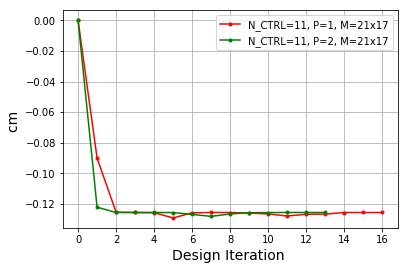

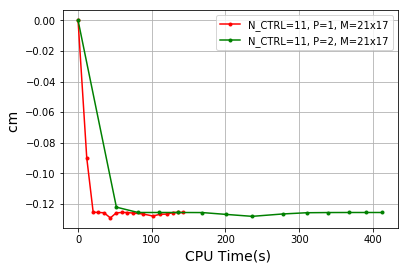

In [10]:
# CM Convergence vs. Iteration
plt.figure(1)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "Design_Iteration", 
                                                      "cm")
#plt.savefig(os.path.join(CONST_figure_output_directory, "grad_vs_iteration_Pall.pdf"))

# CM Convergence vs. CPU time
plt.figure(2)
Optimization_Convergence_Plotter.add_convergence_plot(CONST_File_list, file_convergence_data, "CPU_Time(s)", 
                                                      "cm")

## Shape Plots
Plots of the initial and final optimized airfoil

### Setup

In [11]:

# Additional files to plot shapes for (for instance, this may store the reference shapes 
# for the optimization). Note that some file names will be None in order to mimic the file format
# from CONST_File_list.

# To get the initial airfoil profile, check the control file and look to see what geometry file (.geo) file was run

CONST_Additional_File_list = [
    (None, DPG_SOLVER_PATH+"input/input_files/euler/steady/NURBS_Airfoil/geometry_parameters_NACA0012_targetCL_tests_reference.geo", None, "Initial Profile", "k", "--", ".", False), # Initial Airfoil
]


In [12]:
# Plot Range (to use for the Airfoil case)
CONST_PLOT_X_RANGE = [-0.65, 0.65]
CONST_PLOT_Y_RANGE = [-0.125, 0.125]


In [13]:
# The points (on the knot domain) to plot
CONST_Airfoil_NURBS_Domain_pts = []
t_vals = np.linspace(-1., 1., 100)
for t in t_vals:
    CONST_Airfoil_NURBS_Domain_pts.append((t, -1.))
    

In [14]:
# Load the file patch data (which describes the geometry)
file_patch_data = []

for data_tuple in CONST_File_list:

    file_abs_path = os.path.join(CONST_OPTIMIZATION_DIR_ABS_PATH, data_tuple[1])
    patch_info = Optimization_Shape_Plotter.read_Patch_file(file_abs_path)

    file_patch_data.append(patch_info)
    

In [15]:
# Load the additional file patch data
file_additional_patch_data = []

for data_tuple in CONST_Additional_File_list:

    file_abs_path = os.path.join(CONST_OPTIMIZATION_DIR_ABS_PATH, data_tuple[1])
    patch_info = Optimization_Shape_Plotter.read_Patch_file(file_abs_path)

    file_additional_patch_data.append(patch_info)
    

### Geometry Plots

/home/vassili/Desktop/DPGSolver/DPGSolver/figs/NCTRL_11M21x17_MD.pdf


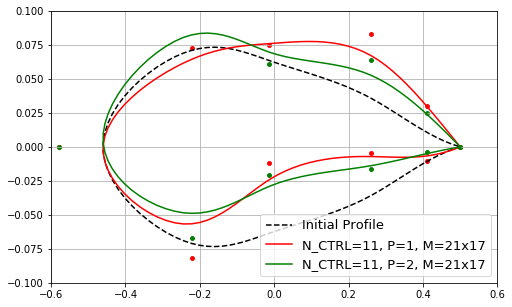

In [16]:

# Plot the geometry
plt.figure(figsize=(8, 5))

# Plot some additional reference profiles
for case_index in range(len(CONST_Additional_File_list)):
    
    # Get the patch information
    patch_data = file_additional_patch_data[case_index]
    case_data_tuple = CONST_Additional_File_list[case_index]
    Optimization_Shape_Plotter.plot_patch_points(patch_data, case_data_tuple, CONST_Airfoil_NURBS_Domain_pts)

    
# Plot the optimized geometries
for case_index in range(len(CONST_File_list)):
    
    # Get the patch information
    patch_data = file_patch_data[case_index]
    case_data_tuple = CONST_File_list[case_index]
    Optimization_Shape_Plotter.plot_patch_points(patch_data, case_data_tuple, CONST_Airfoil_NURBS_Domain_pts)

    
plt.legend(prop={'size':13}, loc='lower right')
plt.grid()

plt.gca().set_xlim(CONST_PLOT_X_RANGE)
plt.gca().set_ylim(CONST_PLOT_Y_RANGE)

#plt.axis("equal")
plt.gca().set_ylim([-0.1,0.1])
plt.gca().set_xlim([-0.6,0.6])
print(os.path.join(CONST_figure_output_directory, FIG_ID+'.pdf'))
plt.savefig(os.path.join(CONST_figure_output_directory, FIG_ID[:-1]+'.pdf'), layout='tight')